# Word Count Analysis

In [27]:
#import libraries
import pandas as pd
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import altair as alt

In [10]:
#import dataframes
df_cty = pd.read_csv('df_cty_final.csv',converters={'words':eval})
df_rb = pd.read_csv('df_rb_final.csv',converters={'words':eval})
df_rock = pd.read_csv('df_rock_final.csv',converters={'words':eval})

### Functions

In [20]:
def word_count(word_list):
    '''
    function returns dataframe with word count information
    parameter:
        word_list-->list of word lists for each song in dataframe
    '''
    #initiate Counter objects
    word_counts = Counter() #number of times a word appears in all songs
    appears_in = Counter() #number of songs in which a word appears
    
    #iterate through lists of words in each song to update variables
    for l in word_list:
        word_counts.update(l)
        appears_in.update(set(l))
    
    #create new dataframe with word, count, and appears_in columns
    df = pd.DataFrame(data={'word':word_counts.keys(),
                            'count':word_counts.values(),
                            'appears_in':appears_in.values()})
    
    #add percent total column (based on total word count)
    df['count_pct'] = df['count'].apply(lambda x: x/df['count'].sum())
    
    #add appears in percent column (based on total number of songs)
    df['appears_in_pct'] = df['appears_in'].apply(lambda x: x/len(word_list))
    
    return df.sort_values(by='count',ascending=False)

In [12]:
def remove_num(text):
    '''
    function returns text with numbers removed
    parameter:
        text-->str
    '''
    for word in text:
        try:
            int(word)
            text.remove(word)
        except:
            pass
    return text

### Create Dataframes with Word Counts

In [21]:
#remove numbers from dataframs
df_cty['words'] = df_cty['words'].apply(remove_num)
df_rb['words'] = df_rb['words'].apply(remove_num)
df_rock['words'] = df_rock['words'].apply(remove_num)

In [22]:
#create dataframes
df_cty_count = word_count(df_cty['words'])
df_rb_count = word_count(df_rb['words'])
df_rock_count = word_count(df_rock['words'])

In [87]:
#country songs - top 5 words
df_cty_count.head(5)

,word,count,appears_in,count_pct,appears_in_pct
52,like,3485,26,0.011290,0.025616
78,know,2785,118,0.009022,0.116256
77,yeah,2538,30,0.008222,0.029557
51,love,2331,142,0.007551,0.139901
82,one,2194,13,0.007107,0.012808


In [92]:
#R&B/hip-hop songs - top 5 words
df_rb_count.head(100)

,word,count,appears_in,count_pct,appears_in_pct
365,yeah,5268,2,0.013843,0.001992
192,like,4881,12,0.012826,0.011952
354,know,3549,10,0.009326,0.009960
269,got,3183,26,0.008364,0.025896
667,oh,2965,51,0.007791,0.050797
...,...,...,...,...,...
182,big,475,13,0.001248,0.012948
1580,im,473,30,0.001243,0.029880
1845,face,471,1,0.001238,0.000996
6,leave,471,1,0.001238,0.000996


In [89]:
#rock/alternative songs - top 5 words
df_rock_count.head(5)

,word,count,appears_in,count_pct,appears_in_pct
12,like,3877,18,0.017364,0.016886
56,yeah,3696,2,0.016553,0.001876
20,know,2914,319,0.013051,0.299250
30,oh,2876,124,0.012880,0.116323
93,love,2493,75,0.011165,0.070356


### Generate Word Clouds

In [85]:
#initialize word cloud generator
wc = WordCloud(max_words=100,background_color='white')

In [ ]:
#country


#word cloud for country songs
#dictionary to generate word cloud
cty_cloud_data = dict(zip(df_cty_count['word'].tolist(), df_cty_count['count'].tolist()))

#generate word cloud
plt.figure(figsize=(10,8))
#cty_cloud = wc.generate_from_frequencies(cty_cloud_data)
plt.imshow(wc.generate_from_frequencies(cty_cloud_data),interpolation="bilinear")
plt.axis("off")
plt.show()
#plt.savefig('my_fig.png')
#plt.close()


### Generate Histograms of Top 10 Words

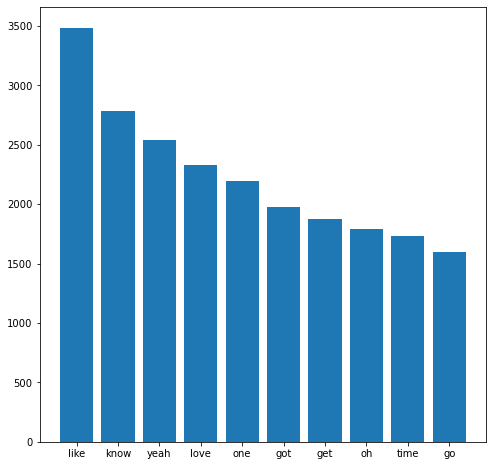

In [57]:
plt.figure(figsize=(8,8))
cty_bar = plt.bar(df_cty_count.iloc[0:10]['word'],df_cty_count.iloc[0:10]['count'])

In [ ]:
#plt.figure(figsize = (12, 8))
#plt.imshow(x, interpolation="bilinear")
#plt.axis("off")
#plt.show()

### Save Images to File

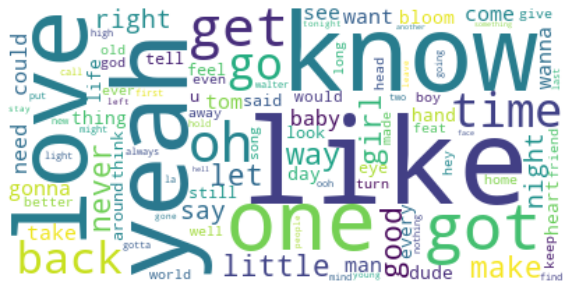

In [ ]:

rb_cloud_data = dict(zip(df_rb_count['word'].tolist(), df_rb_count['count'].tolist()))

#generate word cloud
plt.figure(figsize=(10,8))
wc.generate_from_frequencies(rb_cloud_data)
plt.imshow(x, interpolation="bilinear")
plt.axis("off")
#plt.savefig('my_fig.png')
plt.close()